# Machine Learning wih Ridge and Lasso

**The idea of this project is from 36DataScience**
* The target is the price 
* the feature is all other data 

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

### Loading the data

In [3]:
data = pd.read_csv('Hitters-fs.csv')
df = data.copy()
df.head()

,AtBat,Hits,Walks,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Salary
0,315,81,39,3449,835,69,321,414,375,632,475.0
1,479,130,76,1624,457,63,224,266,263,880,480.0
2,496,141,37,5628,1575,225,828,838,354,200,500.0
3,321,87,30,396,101,12,48,46,33,805,91.5
4,594,169,35,4408,1133,19,501,336,194,282,750.0


In [6]:
df.isna().sum()

AtBat      0
Hits       0
Walks      0
CAtBat     0
CHits      0
CHmRun     0
CRuns      0
CRBI       0
CWalks     0
PutOuts    0
Salary     0
dtype: int64

In [14]:
# Check the correlation between the dependent and independent variables
correlation = df.corr()
correlation['Salary'].sort_values(ascending=True)

PutOuts    0.300480
AtBat      0.394771
Hits       0.438675
Walks      0.443867
CWalks     0.489822
CHmRun     0.524931
CAtBat     0.526135
CHits      0.548910
CRuns      0.562678
CRBI       0.566966
Salary     1.000000
Name: Salary, dtype: float64

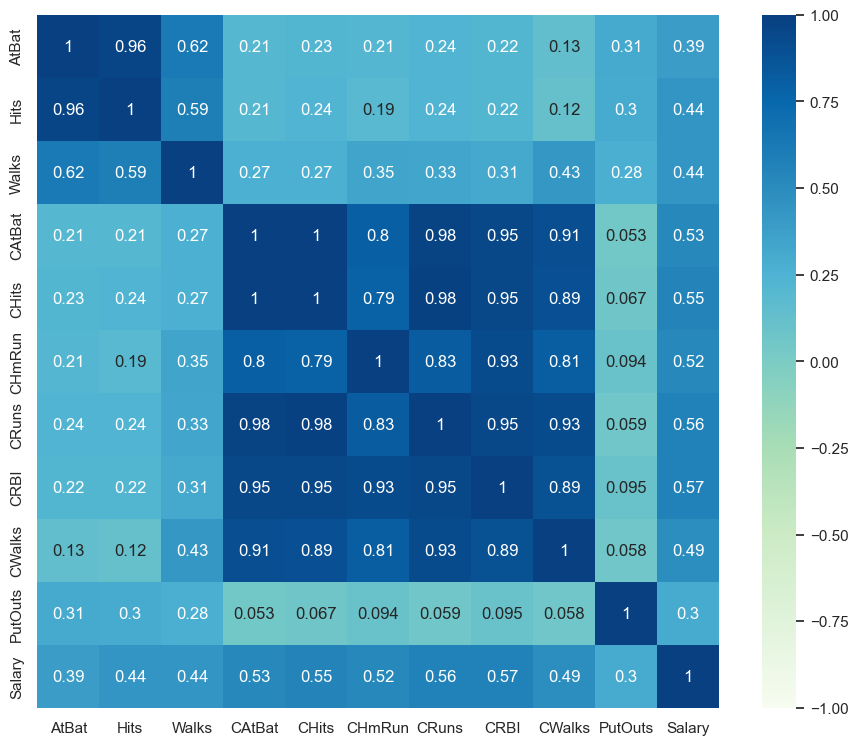

In [21]:
# Check for multicolinearity
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(),
            vmin = -1, 
            vmax = 1,
            cmap ="GnBu",
            annot=True)
plt.show()

### Defining the X and the y variables 

In [4]:
X = df.drop('Salary', axis = 1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=365)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

### LinearRegression

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [8]:
print("Linear Regression coefficients are: ",lin_reg.coef_)
print("Linear Regression y-intercept is: ",lin_reg.intercept_)

Linear Regression coefficients are:  [-209.29031637  200.14361436   87.10197979 -875.47484675  790.71979606
   16.39785005  357.0970638    56.84082885 -124.96836551  120.00801084]
Linear Regression y-intercept is:  532.2961176470588


## Predict 

In [22]:
lin_reg_y_pred = lin_reg.predict(X_test)
lin_reg_y_pred[:5].round(2)

array([337.55, 529.82, 687.26, 752.35, 454.25])

In [24]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print("Linear Regression Model Training Score: ",lin_reg.score(X_train, y_train))
print("Linear Regression Model Testing Score: ",lin_reg.score(X_test, y_test))

Linear Regression Model RMSE is:  301.51617214402563
Linear Regression Model Training Score:  0.5216785712968777
Linear Regression Model Testing Score:  0.39366641684288894


## Perform ridge regression 

In [11]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

In [12]:
# Initializing the ridge regressor
ridge = RidgeCV(alphas=np.arange(0.1, 10, 0.1), cv=cv, scoring='neg_mean_absolute_error')

In [13]:
# Fitting the ridge regressor
ridge.fit(X_train,y_train)
ridge_reg_y_pred = ridge.predict(X_test)

print("Ridge tuning parameter:", (ridge.alpha_))
print ("Ridge model coefficients:", (ridge.coef_))
print ("Ridge model intercept:", (ridge.intercept_))

Ridge tuning parameter: 9.9
Ridge model coefficients: [-88.0865865  123.6341913   67.61541796 -32.36905665 103.67846688
  17.22112463 132.80657008  78.40609934 -84.13905525 122.70711041]
Ridge model intercept: 532.2961176470588


In [15]:
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Ridge Regression Model Training Score: ",ridge.score(X_train, y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))

Ridge Regression Model RMSE is:  286.0707758714061
Ridge Regression Model Training Score:  0.48366608705006053
Ridge Regression Model Testing Score:  0.4541951517401597


##  Lasso regressor

In [16]:
# Initializing the lasso regressor
lasso = LassoCV(alphas=np.arange(0.1, 10.0, 0.1), cv=cv, tol = 1)

In [17]:
# Fitting the lasso regressor
lasso.fit(X_train,y_train)
lasso_reg_y_pred = lasso.predict(X_test)

print("Lasso tuning parameter:", (lasso.alpha_))
print ("Lasso model coefficients:", (lasso.coef_))
print ("Lassso model intercept:", (lasso.intercept_))

Lasso tuning parameter: 0.1
Lasso model coefficients: [ 35.98164565  50.65538287  66.9826693  198.74142951  21.35532169
  28.19516389 -21.94717264  16.0421075  -41.4070888  121.22091612]
Lassso model intercept: 532.2961176470588


In [18]:
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))
print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Lasso Regression Model RMSE is:  294.3112778516601
Lasso Regression Model Training Score:  0.43611579410472534
Lasso Regression Model Testing Score:  0.4222975490396824


## Communicate and compare score

In [19]:
print("Linear Regression Model Training Score: ",lin_reg.score(X_train, y_train))
print("Linear Regression Model Testing Score: ",lin_reg.score(X_test, y_test))
print("Ridge Regression Model Training Score: ",ridge.score(X_train, y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))
print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Linear Regression Model Training Score:  0.5216785712968777
Linear Regression Model Testing Score:  0.39366641684288894
Ridge Regression Model Training Score:  0.48366608705006053
Ridge Regression Model Testing Score:  0.4541951517401597
Lasso Regression Model Training Score:  0.43611579410472534
Lasso Regression Model Testing Score:  0.4222975490396824


In [20]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))

Linear Regression Model RMSE is:  301.51617214402563
Ridge Regression Model RMSE is:  286.0707758714061
Lasso Regression Model RMSE is:  294.3112778516601


///////////////// **Practice examen from 365Data**   //////////////////